# Assignment 7: Linear Model Selection and Regularization

### Student: Rodolfo Lerma

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Learning Objectives
- Produce a model with l2 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with l1 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with both l1 and l2 regularization terms, with a statistically significant improvement over a model without regularization.
- Produce a logistic regression model with a statistically significant improvement over the null model (a model without input - variables).
- Produce a generalized additive model with a statistically significant improvement over the null model (a model without input variables).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('House Prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
data.shape

(1460, 81)

We can see the original data set contains 81 features and 1460 rows.

### Question 1.1: Drop the Id column as it is not needed for prediction

In [3]:
data.drop(columns = 'Id', inplace = True)

## Data Exploration

In [13]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

### Missing Values (Columns with the missing more than 50% of the data)

In [10]:
missing_values = []
my_list = data.columns.values.tolist()
y = data.shape
for i in my_list:
    x = data[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

missing_columns_names = []
for key, value in columns_missing.items():
    if value > (data.shape[0])/2 : #50% of the data
        x = key
        missing_columns_names.append(x)
print(missing_columns_names)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [11]:
data = data.drop(missing_columns_names, axis = 1)
data.shape

(1456, 76)

### Question 1.2: Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

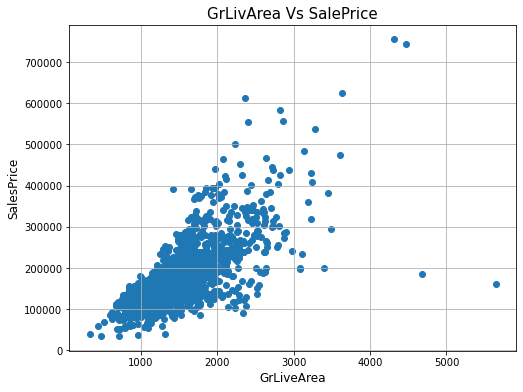

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.title('GrLivArea Vs SalePrice', fontsize = 15)
plt.xlabel('GrLiveArea', fontsize = 12)
plt.ylabel('SalesPrice', fontsize = 12)
plt.grid()
plt.show()

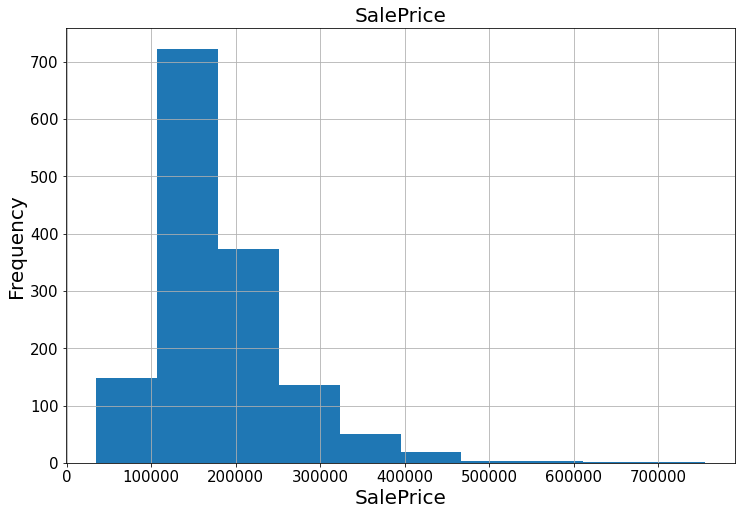

In [6]:
data['SalePrice'].hist(figsize = (12,8))
plt.xlabel('SalePrice', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('SalePrice', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

### Question 1.3: Removing outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

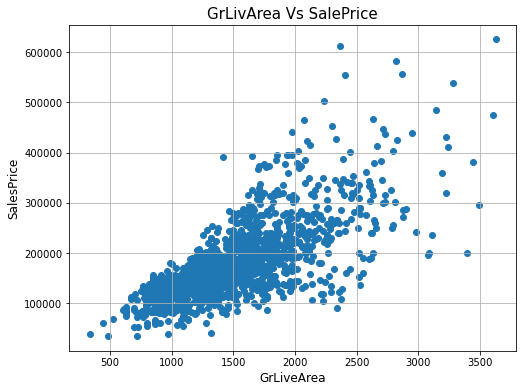

In [7]:
# Remove outliers for data['GrLivArea']>4000
data = data[data['GrLivArea']<4000]

#To Do Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.title('GrLivArea Vs SalePrice', fontsize = 15)
plt.xlabel('GrLiveArea', fontsize = 12)
plt.ylabel('SalesPrice', fontsize = 12)
plt.grid()
plt.show()

### Quesiont 2.1: Convert categorical variable into dummy variables using pandas get_dummies API

In [8]:
data = #to do

SyntaxError: invalid syntax (<ipython-input-8-25b256e0e0f9>, line 1)

### Question 2.2: Impute missing data by the median of each column.

### Question 2.2b: Make sure that there are no null values remaining

### Question 2.3: Generate train test split 70/30. Set random_state=42

In [ ]:
from sklearn.model_selection import train_test_split


### Question 3.1: Train a linear regression algorithm to predict `SalePrice` from the remaining features.

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV
from sklearn.metrics import mean_squared_error

#Fit a linear regression model to this data


### Question 3.2: Evaluate the model and report the performance on both training and test data. These numbers will serve as our benchmark performance.

In [ ]:
#Compute the RMSE 


We now train a regularized version of `LinearRegression` called `Lasso` (you can load it from the same library). `Lasso` has an argument called `alpha`, which is the **shrinkage parameter** we referred to earlier.

### Question 4.1: Let `alpha = 0.000001` and train a `Lasso` algorithm. Show that the resulting model is practically identical to the one we trained with `LinearRegression`. There are different ways to show this, so you will need to think of a way. <span style="color:red" float:right>[2 point]</span>

In [ ]:
from sklearn import linear_model



#Compute the RMSE 


### Question 4.2: Iteratively train a new `Lasso` model, letting `alpha` change each time to one of the values given by `alpha_vals` below, keeping track of the performance on the training and test data each time, and storing the model's coefficients each time (the `coef_` attribute of the trained model)

In [ ]:
alpha_vals = np.arange(0.01, 5, .01) # values of alpha we want to iterate over

# pd.DataFrame({'linreg': linreg.coef_, 'lasso': clf.coef_}).head(10)



### Question 4.3: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

### Question 4.4: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`. HINT: They should appear to be shrinking toward zero as you increase `alpha`!

### Question 5.1: Repeat steps in Question 4 this time using `Ridge` instead of `Lasso`. We will use the following range for `alpha`: <span style="color:red" float:right>[2 point]

In [ ]:
alpha_vals = np.arange(0.1, 200, 1)

In [ ]:
# pd.DataFrame({'linreg': linreg.coef_, 'lasso': clf.coef_}).head(10)


### Question 5.2: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

### Question 5.3: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`.

### Question 6: Repeat questions 5.1 - 5.3 using elasticnet experimenting with differnet values of alpha

### Question 7: Based on the results, briefly describe the effect of changing `alpha` on the coefficients of both `Ridge`, `Lasso`, anf `ElasticNet`. What value of `alpha` would you choose for each case? You do not need to give a precise answer, but choose a number.

### Question 8: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include:

- What was your incoming experience with this model, if any? 
- What steps you took, what obstacles you encountered. 
- How you link this exercise to real-world, machine learning problem-solving. (What steps were missing? 
- What else do you need to learn?